In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Denoising
    denoised_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # Binarization using Otsu's method
    _, binary_image = cv2.threshold(denoised_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the binary image (background white, text black)
    inverted_image = cv2.bitwise_not(binary_image)

    # Morphological operations (dilation)
    kernel = np.ones((3, 3), np.uint8)
    dilated_image = cv2.dilate(inverted_image, kernel, iterations=1)

    # Display all images in subplots
    plt.figure(figsize=(12, 8))
    
    # Original Image
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Grayscale Image
    plt.subplot(2, 3, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    
    # Denoised Image
    plt.subplot(2, 3, 3)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')
    plt.axis('off')

    # Binary Image
    plt.subplot(2, 3, 4)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binary Image')
    plt.axis('off')

    # Inverted Image
    plt.subplot(2, 3, 5)
    plt.imshow(inverted_image, cmap='gray')
    plt.title('Inverted Image')
    plt.axis('off')

    # Dilated Image
    plt.subplot(2, 3, 6)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Dilated Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Denoising using Non-Local Means Denoising
    denoised_image = cv2.fastNlMeansDenoising(gray_image, None, 30, 7, 21)

    # Apply sharpening using a kernel
    sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(denoised_image, -1, sharpening_kernel)

    # Binarization using Otsu's method
    _, binary_image = cv2.threshold(sharpened_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the binary image (background white, text black)
    inverted_image = cv2.bitwise_not(binary_image)

    # Morphological operations (dilation)
    kernel = np.ones((3, 3), np.uint8)
    dilated_image = cv2.dilate(inverted_image, kernel, iterations=1)

    # Display all images in subplots
    plt.figure(figsize=(12, 8))
    
    # Original Image
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Grayscale Image
    plt.subplot(2, 3, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    
    # Denoised Image
    plt.subplot(2, 3, 3)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')
    plt.axis('off')

    # Sharpened Image
    plt.subplot(2, 3, 4)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Sharpened Image')
    plt.axis('off')

    # Binary Image
    plt.subplot(2, 3, 5)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binary Image')
    plt.axis('off')

    # Inverted Image
    plt.subplot(2, 3, 6)
    plt.imshow(inverted_image, cmap='gray')
    plt.title('Inverted Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Denoising using Non-Local Means Denoising
    denoised_image = cv2.fastNlMeansDenoising(gray_image, None, 30, 7, 21)

    # Apply adaptive histogram equalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(denoised_image)

    # Binarization using adaptive thresholding
    binary_image = cv2.adaptiveThreshold(equalized_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY_INV, 11, 2)

    # Invert the binary image (background white, text black)
    inverted_image = cv2.bitwise_not(binary_image)

    # Morphological operations (dilation)
    kernel = np.ones((3, 3), np.uint8)
    dilated_image = cv2.dilate(inverted_image, kernel, iterations=1)

    # Sobel Edge Detection
    sobel_x = cv2.Sobel(denoised_image, cv2.CV_64F, 1, 0, ksize=5)  # Horizontal edges
    sobel_y = cv2.Sobel(denoised_image, cv2.CV_64F, 0, 1, ksize=5)  # Vertical edges
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Combine both directions
    sobel_combined = cv2.convertScaleAbs(sobel_combined)  # Convert back to uint8

    # Reduce intensity of Sobel edges for subtle effect
    subtle_sobel = cv2.multiply(sobel_combined, 0.3)  # Change the factor as needed

    # Invert the subtle Sobel image (edges become white)
    inverted_sobel = cv2.bitwise_not(subtle_sobel)

    # Canny Edge Detection
    canny_edges = cv2.Canny(denoised_image, 100, 200)

    # Display all images in subplots
    plt.figure(figsize=(12, 10))
    
    # Original Image
    plt.subplot(3, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Grayscale Image
    plt.subplot(3, 3, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    
    # Denoised Image
    plt.subplot(3, 3, 3)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')
    plt.axis('off')

    # Equalized Image
    plt.subplot(3, 3, 4)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image (CLAHE)')
    plt.axis('off')

    # Binary Image
    plt.subplot(3, 3, 5)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binary Image')
    plt.axis('off')

    # Inverted Image
    plt.subplot(3, 3, 6)
    plt.imshow(inverted_image, cmap='gray')
    plt.title('Inverted Image')
    plt.axis('off')

    # Inverted Subtle Sobel Edges
    plt.subplot(3, 3, 7)
    plt.imshow(inverted_sobel, cmap='gray')
    plt.title('Inverted Subtle Sobel Edges')
    plt.axis('off')

    # Canny Edges
    plt.subplot(3, 3, 8)
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


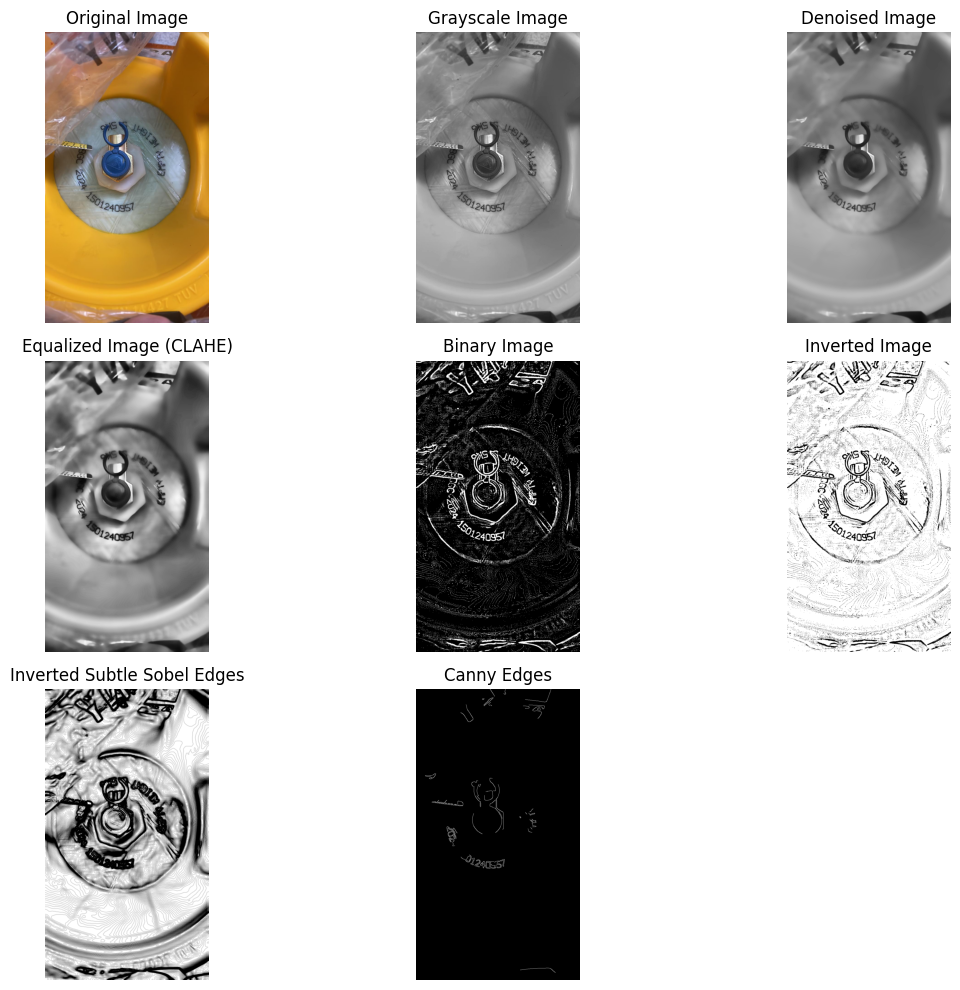

In [33]:
image_path = './images/1 (2).jpeg'
preprocess_image(image_path)